In [283]:
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
df=pd.read_csv('news_data_total.csv')
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [169]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [170]:
df.head()

,news_headline,news_article,news_category
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [171]:
df.isnull().values.any()

False

In [172]:
df.apply(pd.isnull).sum()

news_headline    0
news_article     0
news_category    0
dtype: int64

In [173]:
df['news_category'].value_counts()

news_category
world            1917
entertainment    1889
sports           1754
technology       1640
politics         1446
science          1287
automobile       1144
Name: count, dtype: int64

In [174]:
df_world=df[df['news_category']=='world']
df_entertainment=df[df['news_category']=='entertainment']
df_sports=df[df['news_category']=='sports']
df_technology=df[df['news_category']=='technology']
df_politics=df[df['news_category']=='politics']
df_science=df[df['news_category']=='science']
df_automobile=df[df['news_category']=='automobile']

In [175]:
df_world_n=df_world.sample(df_automobile.shape[0])
df_entertainment_n=df_entertainment.sample(df_automobile.shape[0])
df_sports_n=df_sports.sample(df_automobile.shape[0])
df_technology_n=df_technology.sample(df_automobile.shape[0])
df_politics_n=df_politics.sample(df_automobile.shape[0])
df_science_n=df_science.sample(df_automobile.shape[0])

In [176]:
df_balanced=pd.concat([df_world_n,df_entertainment_n,df_sports_n,df_technology_n,df_politics_n,df_science_n,df_automobile])

In [177]:
df_balanced.shape

(8008, 3)

In [178]:
df_balanced['news_category'].value_counts()

news_category
world            1144
entertainment    1144
sports           1144
technology       1144
politics         1144
science          1144
automobile       1144
Name: count, dtype: int64

In [179]:
def word_cloud(data,tit):
    plt.figure(figsize=(13,11))
    all_sen=' '.join(data)
    wordcloud_te=WordCloud(height=500,width=800,random_state=101,max_font_size=100).generate(all_sen)
    plt.imshow(wordcloud_te)
    plt.title(tit)
    plt.axis('off')
    plt.show()

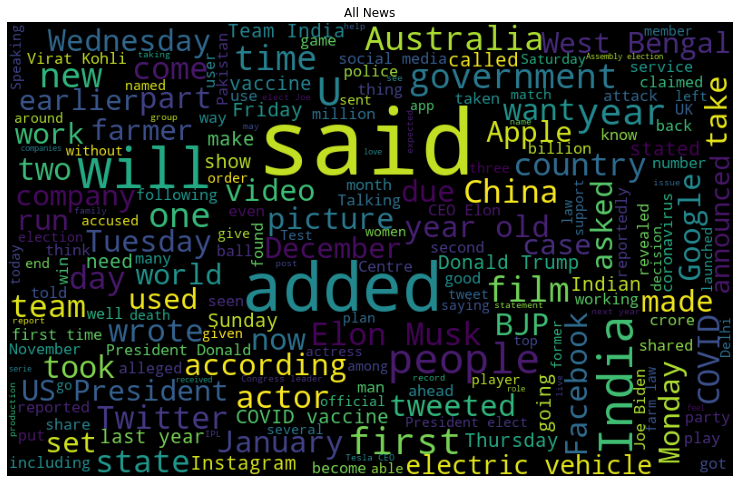

In [180]:
word_cloud(df_balanced['news_article'].tolist(),'All News')

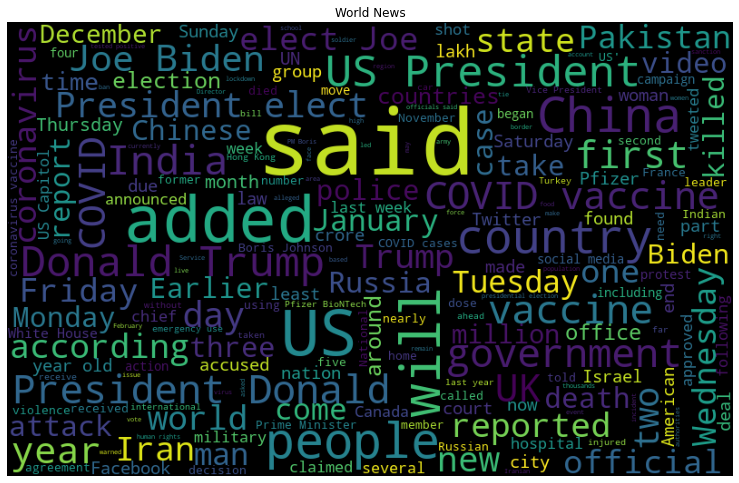

In [181]:
word_cloud([sentence for sentence in df_balanced['news_article'][df_balanced['news_category']=='world']],'World News')

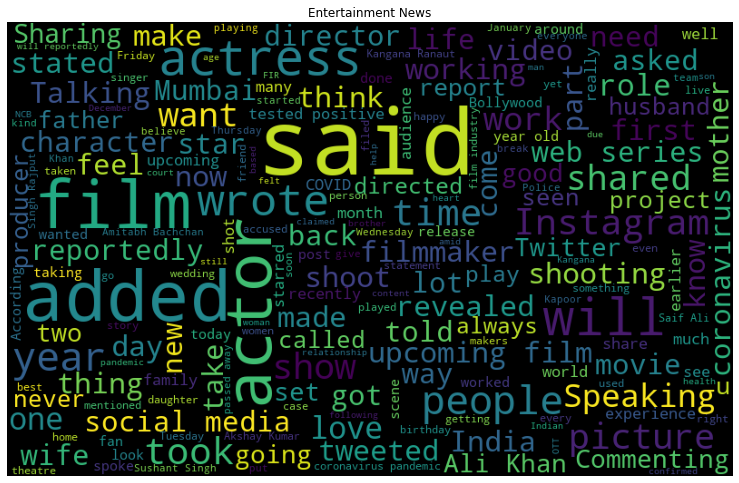

In [182]:
word_cloud(df_balanced['news_article'][df_balanced['news_category']=='entertainment'].tolist(),'Entertainment News')

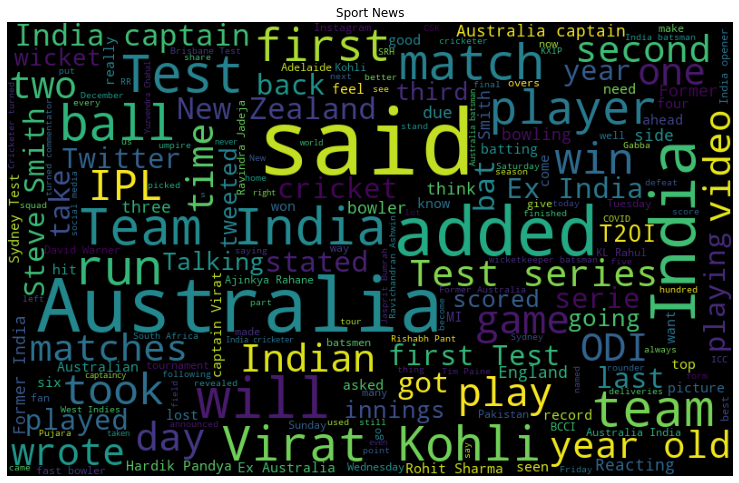

In [183]:
word_cloud([sentence for sentence in df_balanced['news_article'][df['news_category']=='sports']],'Sport News')

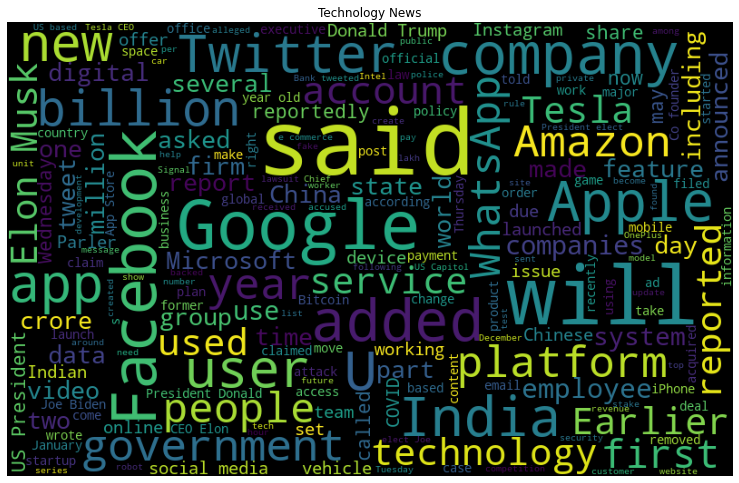

In [184]:
word_cloud(df_balanced['news_article'][df_balanced['news_category']=='technology'].tolist(),'Technology News')

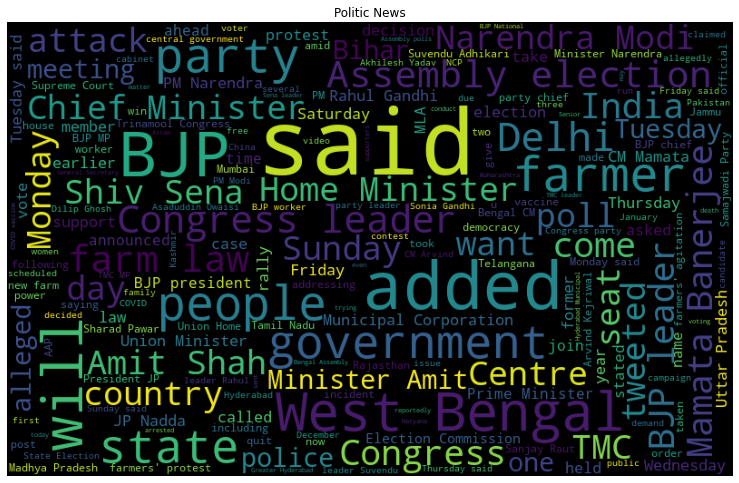

In [185]:
word_cloud([sentence for sentence in df_balanced['news_article'][df_balanced['news_category']=='politics']],'Politic News')

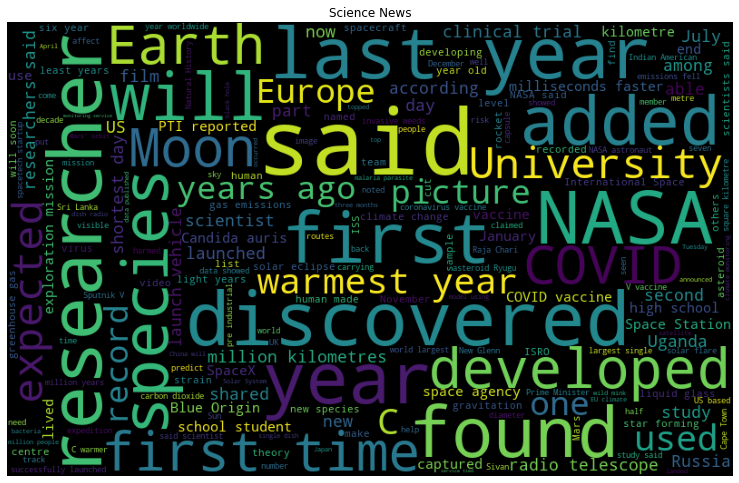

In [186]:
word_cloud(df_balanced['news_article'][df_balanced['news_category']=='science'].tolist(),'Science News')

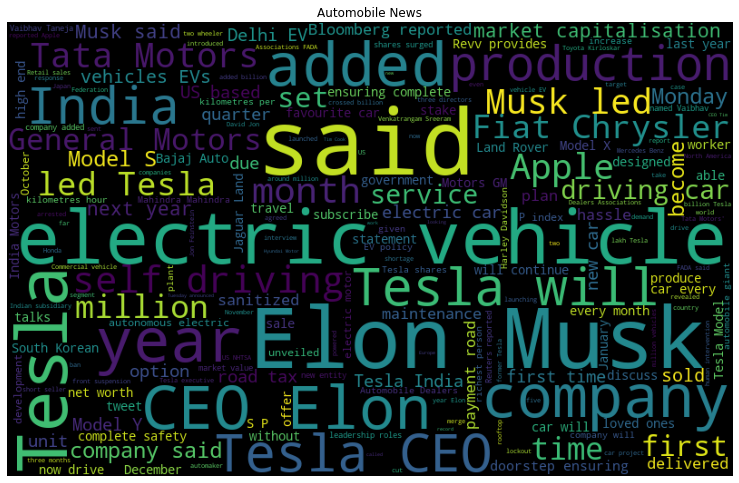

In [187]:
word_cloud([sentence for sentence in df_balanced['news_article'][df_balanced['news_category']=='automobile']],'Automobile News')

In [188]:
sw=stopwords.words('english')

In [189]:
lemmatizer=WordNetLemmatizer()

In [190]:
def preprocessing_text(text):
    text=text.lower()
    text=re.sub('[^a-z]',' ',text)
    text=re.sub('\s+[a-z]\s+',' ',text)
    text=re.sub('\s+',' ',text)
    words=[word for word in text.split() if word not in sw]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [191]:
df_balanced['pre_news']=df_balanced['news_article'].apply(preprocessing_text)

In [192]:
df_balanced.head()

,news_headline,news_article,news_category,pre_news
471,Iranian Prez accuses Israel of killing scienti...,President Hassan Rouhani on Saturday accused I...,world,president hassan rouhani saturday accused isra...
5565,UK PM Boris Johnson to be Republic Day Chief G...,UK Prime Minister Boris Johnson has accepted t...,world,uk prime minister boris johnson accepted invit...
1397,Trump has left US more divided than ever: Repu...,Indian-American Republican leader Gurinder Sin...,world,indian american republican leader gurinder sin...
1151,Journalist held over Wuhan reporting has feedi...,A Chinese citizen journalist detained after re...,world,chinese citizen journalist detained reporting ...
4067,Pfizer vaccine data meets expectations for eme...,The US Food and Drug Administration (FDA) has ...,world,u food drug administration fda said pfizer bio...


In [193]:
le=LabelEncoder()

In [194]:
df_balanced['label']=le.fit_transform(df_balanced['news_category'])

In [195]:
df_balanced.sample(5)

,news_headline,news_article,news_category,pre_news,label
7106,Who gave people the right to troll Anushka: Pr...,After several social media users trolled capta...,sports,several social medium user trolled captain vir...,4
2162,"Brand new Porsche hits SUV, crashes over wall ...",A newly-purchased Porsche Taycan in the UK hit...,automobile,newly purchased porsche taycan uk hit parked s...,0
2502,"US sanctions Chinese, Russian firms over Iran ...",US Secretary of State Mike Pompeo on Friday an...,world,u secretary state mike pompeo friday announced...,6
5096,Way to dream big: Sunny Leone on Bihar student...,Actress Sunny Leone has reacted to a college s...,entertainment,actress sunny leone reacted college student bi...,1
6749,200 victims of suspected Russian hacking ident...,"At least 200 organisations, including the US g...",technology,least organisation including u government agen...,5


In [196]:
nlp=spacy.load('en_core_web_lg')

In [197]:
def get_vector(text):
    return nlp(text).vector

In [198]:
df_balanced['vector']=df_balanced['pre_news'].apply(get_vector)

In [199]:
df_balanced.head()

,news_headline,news_article,news_category,pre_news,label,vector
471,Iranian Prez accuses Israel of killing scienti...,President Hassan Rouhani on Saturday accused I...,world,president hassan rouhani saturday accused isra...,6,"[0.0987175, 0.64424586, -1.2193527, 0.47988093..."
5565,UK PM Boris Johnson to be Republic Day Chief G...,UK Prime Minister Boris Johnson has accepted t...,world,uk prime minister boris johnson accepted invit...,6,"[0.68446225, -1.2367904, -0.80555815, -1.26802..."
1397,Trump has left US more divided than ever: Repu...,Indian-American Republican leader Gurinder Sin...,world,indian american republican leader gurinder sin...,6,"[-0.78869486, 0.91605115, -1.3041216, -0.06515..."
1151,Journalist held over Wuhan reporting has feedi...,A Chinese citizen journalist detained after re...,world,chinese citizen journalist detained reporting ...,6,"[0.09562909, 0.14343624, -1.7023454, 1.324348,..."
4067,Pfizer vaccine data meets expectations for eme...,The US Food and Drug Administration (FDA) has ...,world,u food drug administration fda said pfizer bio...,6,"[-0.5650345, 0.43672317, -0.20878427, 0.252241..."


In [200]:
X_train,X_test,y_train,y_test=train_test_split(df_balanced['vector'],df_balanced['label'],test_size=0.2,
                                              random_state=101,stratify=df_balanced['label'],shuffle=True)

In [201]:
X_train.shape

(6406,)

In [202]:
X_test.shape

(1602,)

In [203]:
y_train.value_counts()

label
0    916
2    915
4    915
3    915
5    915
6    915
1    915
Name: count, dtype: int64

In [204]:
y_test.value_counts()

label
4    229
5    229
1    229
6    229
3    229
2    229
0    228
Name: count, dtype: int64

In [205]:
X_train

9947    [-0.26685986, 0.44565773, -1.0620039, 0.583746...
360     [-0.9171384, 0.73255175, -0.60308456, -0.51218...
2203    [-1.1463982, -0.16121167, -0.55444956, -0.4151...
3089    [0.44719234, 0.6487411, -0.8203921, 0.58008534...
5511    [-0.14057405, 0.66675663, -1.8883213, 0.590832...
                              ...                        
6445    [-0.30267972, -0.28884298, -0.78095734, 0.5402...
7281    [-0.7453374, 0.15597105, -0.6246694, 0.4724868...
83      [-0.15858904, 0.06191367, -1.090396, 0.1369598...
6585    [-0.517117, 0.8485245, -0.20966633, -0.0090836...
7113    [-0.04995977, 1.1173757, -0.65045464, 0.276155...
Name: vector, Length: 6406, dtype: object

In [206]:
X_test

3904     [-0.75152904, 0.45768365, -0.45845926, 0.22648...
3185     [-0.7541765, 0.83241767, -0.31981423, 0.341734...
1892     [-0.7719409, 0.28046045, -0.9953127, -0.335229...
9057     [-0.9293436, -0.9680521, -1.3387405, 0.4613023...
10536    [0.25809717, 0.94289184, -0.6063466, 0.1289034...
                               ...                        
5958     [-0.9641841, 0.48528346, -1.6857173, 1.0994296...
2439     [-0.23291792, -0.16344428, -0.3823579, 0.83716...
8686     [-0.72295946, 0.9316919, -0.3167194, 1.8055012...
2150     [-0.7001934, 0.3830209, -1.0228578, -1.1501856...
1286     [-0.66094345, -0.70011145, -1.4558082, 0.78741...
Name: vector, Length: 1602, dtype: object

In [207]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [208]:
X_train_2d

array([[-0.26685986,  0.44565773, -1.0620039 , ..., -0.8273749 ,
        -0.6210049 ,  1.4014667 ],
       [-0.9171384 ,  0.73255175, -0.60308456, ...,  0.10172862,
        -0.9272183 ,  0.5904828 ],
       [-1.1463982 , -0.16121167, -0.55444956, ..., -2.0838716 ,
        -1.3260328 ,  0.388716  ],
       ...,
       [-0.15858904,  0.06191367, -1.090396  , ..., -1.1075009 ,
        -1.0314088 ,  0.46312508],
       [-0.517117  ,  0.8485245 , -0.20966633, ..., -0.52077687,
        -0.37851718,  1.6709833 ],
       [-0.04995977,  1.1173757 , -0.65045464, ...,  0.20615971,
        -1.7385689 ,  0.6890765 ]], dtype=float32)

In [209]:
X_test_2d

array([[-0.75152904,  0.45768365, -0.45845926, ...,  0.12702742,
         0.51670015, -0.09250569],
       [-0.7541765 ,  0.83241767, -0.31981423, ..., -1.8209783 ,
        -1.9006462 ,  0.3187595 ],
       [-0.7719409 ,  0.28046045, -0.9953127 , ...,  0.5020309 ,
        -1.804145  ,  1.2089819 ],
       ...,
       [-0.72295946,  0.9316919 , -0.3167194 , ..., -1.6023864 ,
        -0.8037607 ,  0.44369474],
       [-0.7001934 ,  0.3830209 , -1.0228578 , ...,  0.7012157 ,
        -1.6879876 ,  0.4621924 ],
       [-0.66094345, -0.70011145, -1.4558082 , ..., -0.9705394 ,
        -0.7690018 ,  1.2509036 ]], dtype=float32)

In [210]:
dt=DecisionTreeClassifier()

In [211]:
dt.fit(X_train_2d,y_train)

DecisionTreeClassifier()

In [212]:
y_pred_dt=dt.predict(X_test_2d)

In [213]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       228
           1       0.84      0.81      0.82       229
           2       0.86      0.90      0.88       229
           3       0.91      0.97      0.94       229
           4       0.86      0.86      0.86       229
           5       0.74      0.73      0.74       229
           6       0.78      0.66      0.72       229

    accuracy                           0.85      1602
   macro avg       0.84      0.85      0.84      1602
weighted avg       0.84      0.85      0.84      1602



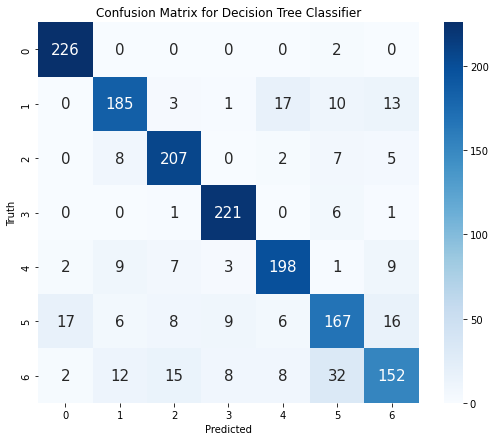

In [214]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [216]:
scaler=MinMaxScaler()

In [217]:
scaled_X_train=scaler.fit_transform(X_train_2d)
scaled_X_test=scaler.fit_transform(X_test_2d)

In [218]:
scaled_X_train

array([[0.5485613 , 0.46654874, 0.46073562, ..., 0.4468583 , 0.631323  ,
        0.559459  ],
       [0.40924343, 0.5269186 , 0.5625764 , ..., 0.6125319 , 0.5651394 ,
        0.39578265],
       [0.36012605, 0.3388478 , 0.57336926, ..., 0.22280535, 0.4789414 ,
        0.35506123],
       ...,
       [0.57175756, 0.3857991 , 0.45443496, ..., 0.39690745, 0.5426201 ,
        0.37007877],
       [0.49494535, 0.5513222 , 0.64988166, ..., 0.5015295 , 0.68373317,
        0.61385393],
       [0.59503067, 0.6078955 , 0.5520643 , ..., 0.6311536 , 0.38977772,
        0.41568127]], dtype=float32)

In [219]:
nb=MultinomialNB()

In [221]:
nb.fit(scaled_X_train,y_train)

MultinomialNB()

In [223]:
y_pred_nb=nb.predict(scaled_X_test)

In [224]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       228
           1       0.74      0.87      0.80       229
           2       0.69      0.86      0.76       229
           3       0.85      0.84      0.84       229
           4       0.89      0.82      0.85       229
           5       0.75      0.66      0.70       229
           6       0.64      0.50      0.56       229

    accuracy                           0.77      1602
   macro avg       0.77      0.77      0.77      1602
weighted avg       0.77      0.77      0.77      1602



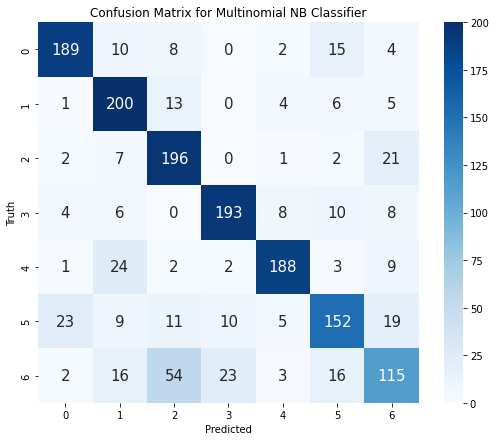

In [225]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred_nb),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Multinomial NB Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [230]:
acc_score=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(scaled_X_train,y_train)
    y_p=knn.predict(scaled_X_test)
    acc_score.append(accuracy_score(y_test,y_p))

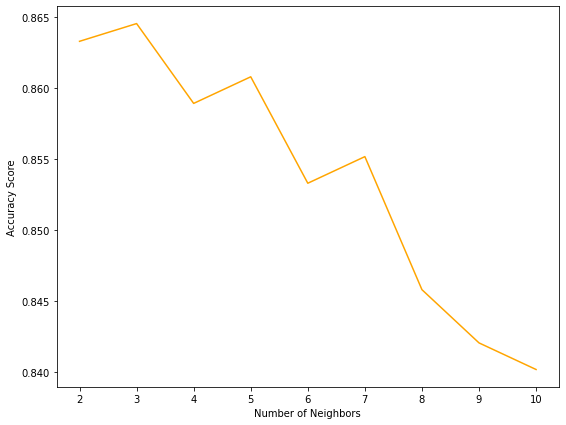

In [231]:
plt.figure(figsize=(9,7))
plt.plot(acc_score,color='orange')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.xticks([0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9,10])
plt.show()

In [232]:
kn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
kn.fit(scaled_X_train,y_train)
y_pred_kn=kn.predict(scaled_X_test)
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       228
           1       0.79      0.90      0.84       229
           2       0.81      0.92      0.86       229
           3       0.95      0.94      0.95       229
           4       0.93      0.93      0.93       229
           5       0.81      0.72      0.76       229
           6       0.88      0.67      0.76       229

    accuracy                           0.86      1602
   macro avg       0.87      0.86      0.86      1602
weighted avg       0.87      0.86      0.86      1602



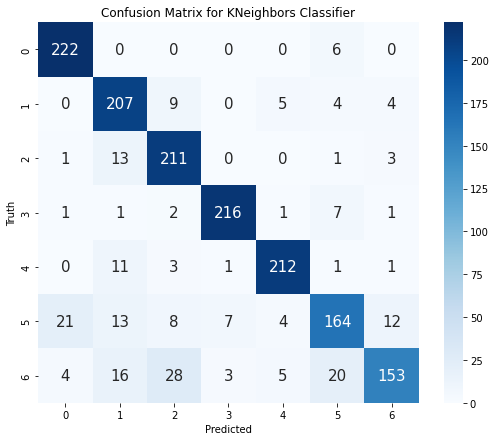

In [233]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred_kn),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [278]:
rf=RandomForestClassifier()

In [279]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [280]:
y_pred_rf=rf.predict(scaled_X_test)

In [281]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       228
           1       0.88      0.93      0.90       229
           2       0.91      0.90      0.91       229
           3       0.96      0.95      0.96       229
           4       0.96      0.92      0.94       229
           5       0.78      0.81      0.79       229
           6       0.79      0.84      0.82       229

    accuracy                           0.89      1602
   macro avg       0.89      0.89      0.89      1602
weighted avg       0.89      0.89      0.89      1602



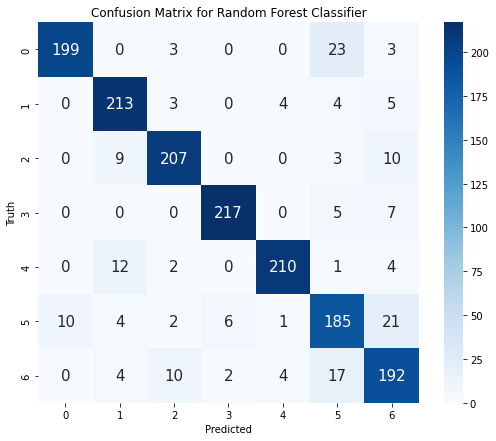

In [282]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [284]:
gb=GradientBoostingClassifier()
gb.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [285]:
y_pred_gb=gb.predict(scaled_X_test)

In [287]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       228
           1       0.87      0.93      0.90       229
           2       0.92      0.85      0.88       229
           3       0.94      0.90      0.92       229
           4       0.91      0.90      0.91       229
           5       0.77      0.78      0.78       229
           6       0.73      0.86      0.79       229

    accuracy                           0.86      1602
   macro avg       0.87      0.86      0.86      1602
weighted avg       0.87      0.86      0.86      1602



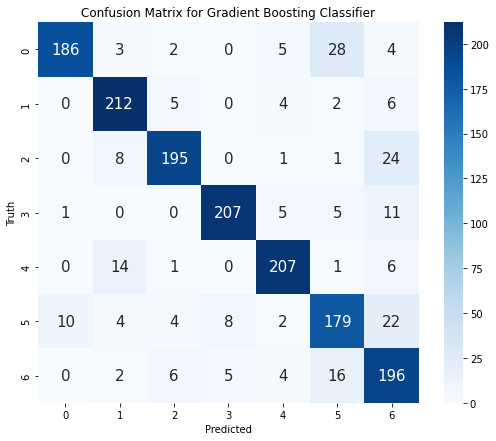

In [288]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred_gb),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()